# **4. Estadística Descriptiva**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [ ]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [ ]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 4
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [ ]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 12
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(10) primeras_100_filas_anemia.xlsx
(11) primeras_100_filas_anemia.gsheet


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [ ]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [ ]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [ ]:
excel_data_file = "/content/drive/MyDrive/Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [ ]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [ ]:
df_met = df_excel.copy()
print(df_met)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [ ]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

In [ ]:
df_anemia = df_csv.copy()
print(df_anemia)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Estadística Descriptiva**

La **estadística descriptiva** tiene como objetivo resumir, organizar y presentar datos de manera clara y comprensible, permitiendo identificar patrones, tendencias o características principales de un conjunto de datos sin hacer inferencias sobre una población mayor.

## 3.1. Organizar Datos



Organizar datos es el proceso fundamental en estadística descriptiva que implica estructurar y preparar un conjunto de datos para su análisis. Este proceso busca facilitar la comprensión, identificación de patrones, cálculo de medidas resumen y la visualización de la información.

Las principales formas de organizar datos incluyen:

*   **Tablas de Frecuencia**
*   **Distribuciones de Frecuencia**
*   **Percentiles y cuartiles**

La organización adecuada de los datos es el primer paso crucial antes de calcular medidas de tendencia central, dispersión o realizar visualizaciones, ya que permite tener una visión clara y concisa de la información disponible.

### 3.1.1. Tablas de frecuencia

Resumen la distribución de una variable, mostrando cuántas veces aparece cada valor o categoría. Esto puede ser en términos de frecuencia absoluta (conteo) o frecuencia relativa (proporción o porcentaje).

In [ ]:
# Calcular la tabla de frecuencias absolutas para la columna 'Sexo'
frecuencia_absoluta_sexo = df_anemia['Sexo'].value_counts()
print("Tabla de Frecuencia Absoluta para 'Sexo':")
print(frecuencia_absoluta_sexo)

Tabla de Frecuencia Absoluta para 'Sexo':
Sexo
M    126255
F    122638
Name: count, dtype: int64


In [ ]:
# Calcular la tabla de frecuencias relativas para la columna 'Sexo'
frecuencia_relativa_sexo = df_anemia['Sexo'].value_counts(normalize=True)
print("\nTabla de Frecuencia Relativa para 'Sexo':")
print(frecuencia_relativa_sexo)


Tabla de Frecuencia Relativa para 'Sexo':
Sexo
M    0.507266
F    0.492734
Name: proportion, dtype: float64


### 3.1.2. Distribuciones de frecuencia

Similar a las tablas de frecuencia, pero a menudo utilizadas para datos cuantitativos continuos, donde los datos se agrupan en intervalos o clases. Esto ayuda a visualizar la forma de la distribución de los datos.

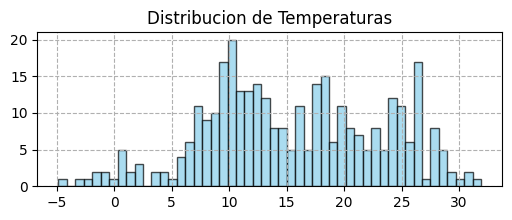

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 2))
axes.hist(df_met["temp_aire"], bins=50, color='skyblue', edgecolor='black', density=False, alpha=0.7)
axes.set_title("Distribucion de Temperaturas")
axes.grid(True, linestyle="--")
plt.show()

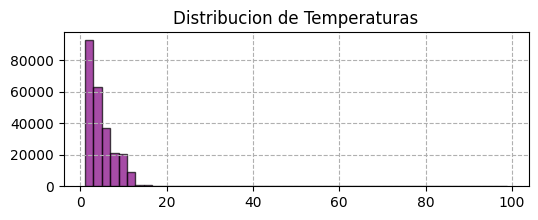

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 2))
axes.hist(df_anemia["Edad"], bins=50, color='purple', edgecolor='black', density=False, alpha=0.7)
axes.set_title("Distribucion de Temperaturas")
axes.grid(True, linestyle="--")
plt.show()

### 3.1.3. Percentiles y cuartiles

### Percentiles y cuartiles

Los percentiles y cuartiles son medidas de posición que dividen un conjunto de datos ordenado en partes iguales, proporcionando información sobre la distribución de los valores.

*   **Percentiles:** Los percentiles dividen un conjunto de datos ordenado en 100 partes iguales. El percentil Pk es el valor por debajo del cual se encuentra el k% de los datos. Por ejemplo, el percentil 90 (P90) es el valor por debajo del cual se encuentra el 90% de los datos. Son útiles para entender la distribución de datos y comparar un valor individual con el resto del conjunto.

*   **Cuartiles:** Los cuartiles son percentiles específicos que dividen el conjunto de datos ordenado en cuatro partes iguales:
    *   **Primer cuartil (Q1):** Corresponde al percentil 25 (P25). Es el valor por debajo del cual se encuentra el 25% de los datos.
    *   **Segundo cuartil (Q2):** Corresponde al percentil 50 (P50). Es la mediana, el valor que divide el conjunto de datos en dos mitades iguales.
    *   **Tercer cuartil (Q3):** Corresponde al percentil 75 (P75). Es el valor por debajo del cual se encuentra el 75% de los datos.



In [ ]:
# Calcular cuartiles (Q1, Q2, Q3)
quartiles_hr = df_met['hr'].quantile([0.25, 0.5, 0.75])
print("Cuartiles para 'hr':")
print(quartiles_hr)

# Calcular percentiles (ejemplo: P10, P90)
percentiles_hr = df_met['hr'].quantile([0.1, 0.9])
print("\nPercentiles para 'hr' (P10 y P90):")
print(percentiles_hr)

# Calcular percentiles personalizados (ejemplo: P5, P50, P95)
percentiles_personalizados_hr = df_met['hr'].quantile([0.05, 0.5, 0.95])
print("\nPercentiles personalizados para 'hr' (P5, P50 y P95):")
print(percentiles_personalizados_hr)

Cuartiles para 'hr':
0.25    45.031250
0.50    57.937500
0.75    70.885417
Name: hr, dtype: float64

Percentiles para 'hr' (P10 y P90):
0.1    35.116667
0.9    80.579167
Name: hr, dtype: float64

Percentiles personalizados para 'hr' (P5, P50 y P95):
0.05    30.233333
0.50    57.937500
0.95    87.295833
Name: hr, dtype: float64


## 3.2. Medidas de Tendencia Central

Las medidas de tendencia central son valores que buscan ubicar el centro de un conjunto de datos. Son estadísticas que resumen un conjunto de valores en un solo número que representa el "centro" o valor típico de la distribución. Son fundamentales para comprender la distribución de los datos y comparar diferentes conjuntos de datos.

Las principales medidas de tendencia central son:

*   **Media aritmética**
*   **Mediana**
*   **Moda**

**¿Para qué sirven las medidas de tendencia central?**

*   **Resumir datos:** Proporcionan un valor único que representa el conjunto de datos, facilitando su comprensión.
*   **Comparar conjuntos de datos:** Permiten comparar el "centro" de diferentes distribuciones de datos.
*   **Identificar valores típicos:** Ayudan a determinar cuál es el valor más representativo o común en un conjunto de datos.
*   **Base para análisis posteriores:** Son el punto de partida para calcular otras medidas estadísticas y realizar análisis más complejos.

### 3.2.1. Media aritmética

La media aritmética ($\overline{x}$) es la suma de todos los valores en un conjunto de datos dividida por el número total de valores. Es la medida de tendencia central más común, pero es sensible a los valores atípicos (extremos).

Sea $x$ una muestra de una población de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$$\overline{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$(eq:mediaAritmetica)

In [ ]:
print(np.mean(df_met["temp_aire"]))

15.556998502994013


In [ ]:
print(df_met["temp_aire"].mean())

15.556998502994013


In [ ]:
print(stats.tmean(df_met["temp_aire"]))

15.556998502994013


### 3.2.2. Mediana y moda

La **mediana** el valor medio de un conjunto de datos cuando los datos están ordenados de menor a mayor. Si el número de datos es impar, la mediana es el valor central. Si el número de datos es par, la mediana es el promedio de los dos valores centrales. La mediana es menos sensible a los valores atípicos que la media.






In [ ]:
print(np.median(df_met["hr"]))

57.9375


In [ ]:
# Calcular la mediana para la columna 'hr'
mediana_hr = df_met['hr'].median()
print("Mediana para 'hr':")
print(mediana_hr)

Mediana para 'hr':
57.9375


 Por otro lado, la **moda** el valor que aparece con mayor frecuencia en un conjunto de datos. Un conjunto de datos puede tener una moda (unimodal), varias modas (multimodal) o ninguna moda. La moda es útil para datos categóricos o discretos.

In [ ]:
# Calcular la moda para la columna 'hr'
moda_hr = df_met['hr'].mode()
print("Moda para 'hr':")
print(moda_hr)

Moda para 'hr':
0    49.291667
1    62.541667
2    72.291667
Name: hr, dtype: float64


**Interpretación del resultado:**
 La moda para `'hr'` muestra tres valores (49.29, 62.54, y 72.29) porque estos tres valores aparecen con la misma frecuencia más alta en el conjunto de datos de la columna 'hr'. Esto significa que la distribución de 'hr' es multimodal, específicamente trimodal en este caso.



In [ ]:
# Calcular la moda para la columna 'hr'
moda_tipoEdad = df_anemia['Tipo_edad'].mode()
print("Moda para 'Tipo_edad':")
print(moda_tipoEdad)

Moda para 'Tipo_edad':
0    A
Name: Tipo_edad, dtype: object


## 3.3. Medidas de Dispesión

Las medidas de dispersión son indicadores estadísticos que describen cuánto se alejan o dispersan los valores de un conjunto de datos respecto a una medida de tendencia central (media, mediana).

En otras palabras, mientras las medidas de tendencia central (media, mediana, moda) indican el centro de los datos, las medidas de dispersión muestran el grado de variabilidad o la homogeneidad de los datos.

### 3.3.1. Varianza

La varianza es una medida estadística de dispersión que cuantifica cuánto se alejan los valores individuales de un conjunto de datos de su media (promedio). En esencia, mide la variabilidad o la "dispersión" de los datos alrededor de la media: una varianza alta indica que los datos están muy dispersos, mientras que una varianza baja significa que los valores están más concentrados cerca de la media.

Sea $x$ una muestra de una población de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$$\mathbf{S}_{x}=\mathbf{\sigma}^{2}_{x} = \frac{1}{n}\sum_{i=1}^{n}(x_{i} -\bar{x})^{2}$$(eq:varianza)

In [ ]:
print(np.var(df_met["temp_aire"]))

58.22304353384678


In [ ]:
print(df_met["temp_aire"].var())

58.39788750842289


### 3.3.2. Desviación estándar

La **desviación estándar** ($\mathbf{\sigma}$) es una medida estadística de dispersión que indica cuánto se desvían los valores de un conjunto de datos con respecto a su media (promedio). En otras palabras, mide la variabilidad o la dispersión de los datos: una desviación estándar baja indica que los valores están agrupados cerca de la media, mientras que una alta sugiere que los valores están más dispersos.

Sea $x$ una muestra de una población de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$$\mathbf{\sigma}_{x} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}$$(eq:desviacionEstandar)

In [ ]:
print(np.std(df_met["temp_aire"]))

7.630402580063962


In [ ]:
print(df_met["temp_aire"].std())

7.6418510524887155


### 3.3.3. Rango intercuartil

El rango intercuartil (RIQ o IQR, por sus siglas en inglés: Interquartile Range) es una medida de dispersión estadística que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos ordenado. En otras palabras, mide la amplitud del 50% central de los datos, excluyendo los valores extremos, y es una herramienta clave en estadística descriptiva para entender la variabilidad de un conjunto de datos.

Sea $x$ una muestra de una población de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$$RIQ = Q_{3} - Q_{1}$$(eq:rangoIntercuartil)

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1_hr = df_met['hr'].quantile(0.25)
Q3_hr = df_met['hr'].quantile(0.75)

# Calcular el Rango Intercuartil (RIQ)
RIQ_hr = Q3_hr - Q1_hr

print(f"El Rango Intercuartil (RIQ) para 'hr' es: {RIQ_hr}")

El Rango Intercuartil (RIQ) para 'hr' es: 25.85416666666667


### 3.4. Medidas de Asociación

En estadística, además de las medidas de tendencia central y dispersión, existen las medidas de relación o correlación, que cuantifican la intensidad y dirección de la asociación entre dos o más variables.

### 3.4.1. Covarianza

La covarianza es una medida estadística que indica el grado de asociación lineal entre dos variables aleatorias.

Sea $x$ é $y$ dos muestras distintas de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$y = (y_{1}, y_{2}, \dots, y_{n})$

$$\mathbf{S}_{xy} = \frac{1}{n}\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})$$(eq:covarianza)

In [ ]:
# Extraer las columnas como arrays de numpy
temp_aire_np = df_met['temp_aire'].values
rxn_solar_np = df_met['rxn_solar'].values

# Calcular la matriz de covarianza usando numpy
cov_matrix = np.cov(temp_aire_np, rxn_solar_np)

# La covarianza entre las dos variables es el elemento fuera de la diagonal
covarianza_np = cov_matrix[0, 1]

print(f"La covarianza entre 'temp_aire' y 'rxn_solar' usando numpy es: {covarianza_np}")

La covarianza entre 'temp_aire' y 'rxn_solar' usando numpy es: 548.19588369245


In [ ]:
# Calcular la covarianza entre 'temp_aire' y 'rxn_solar'
covarianza_temp_rxn = df_met['temp_aire'].cov(df_met['rxn_solar'])
print(f"La covarianza entre 'temp_aire' y 'rxn_solar' es: {covarianza_temp_rxn}")

La covarianza entre 'temp_aire' y 'rxn_solar' es: 548.19588369245


### 3.4.1 Coeficiente de correlación de Pearson

El **coeficiente de correlación de Pearson** ($r$) mide la fuerza y dirección de la relación lineal entre dos variables cuantitativas.

Sea $x$ é $y$ dos muestras distintas de **$n$** elementos.

$x = (x_{1}, x_{2}, \dots, x_{n})$

$y = (y_{1}, y_{2}, \dots, y_{n})$

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \; \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$(eq:correlacionPearson)



In [ ]:
# Calcular el coeficiente de Pearson usando pandas
pearson_corr_pandas = df_met['temp_aire'].corr(df_met['rxn_solar'])
print(f"Coeficiente de Pearson (pandas): {pearson_corr_pandas}")

# Calcular el coeficiente de Pearson usando numpy
pearson_corr_numpy = np.corrcoef(df_met['temp_aire'], df_met['rxn_solar'])[0, 1]
print(f"Coeficiente de Pearson (numpy): {pearson_corr_numpy}")

# Calcular el coeficiente de Pearson usando scipy.stats
pearson_corr_stats, _ = stats.pearsonr(df_met['temp_aire'], df_met['rxn_solar'])
print(f"Coeficiente de Pearson (scipy.stats): {pearson_corr_stats}")

Coeficiente de Pearson (pandas): 0.7463695395822112
Coeficiente de Pearson (numpy): 0.7463695395822112
Coeficiente de Pearson (scipy.stats): 0.7463695395822112


# **IV. Referencias**

**Libros y manuales**

- [Libro de estadisitica con python]( https://www.editorial-sciela.org/index.php/sciela/article/view/16/49)



- [Introducción a la teoria de probabilidades](https://ciladi.org/wp-content/uploads/Version_final_Introduccion-Probabilidad-Python-vf_Bayas-3.pdf)

  

- [Guía practica de análsis exploratorio de python](https://datos.gob.es/sites/default/files/doc/file/guia_eda_python.pdf)


**Cursos en linea**

- [Estadística W3School](https://www.w3schools.com/statistics/index.php)

- [Estadística con python](https://docs.python.org/es/3/library/statistics.html)

- [Kaggle](https://www.kaggle.com/code/saurav9786/statistics-for-data-scientists)

**Chatbots de inteligencia artifical**

[Gemini iA](https://gemini.google.com), [DeepSeek](https://www.deepseek.com/), [Chat GPT](https://chatgpt.com/), [Claude IA](https://claude.ai/) y [Julius IA](https://julius.ai)

